# Hands-On Pertemuan 9: Spark SQL

## Tujuan:
- Mengasah keterampilan analisis data menggunakan Spark SQL.
- Melakukan lebih banyak latihan SQL yang mengarah ke skenario dunia nyata.
- Mempersiapkan mahasiswa untuk menggunakan Spark SQL dalam proyek besar.


### 1. Refresher: Basic SQL Operations in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.


In [ ]:
pip install pyspark==3.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285391 sha256=0543a97df5e1d709c9c608c645e02d37edd4bcaab07ca7ed44fdcb1cbbef12fc
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.3
    Uninstalling pyspark-3.5.3:
      Successfully uninstalled pyspark-3.5.3


In [ ]:
pip install pandas


In [ ]:
pip install findspark

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MySparkApp").getOrCreate()
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.


In [ ]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


In [ ]:
#1. Cari rata-rata gaji per departemen.
spark.sql('''
SELECT DeptId, AVG(Salary) as AvgSalary
FROM employees
GROUP BY DeptId
''').show()

+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+



In [ ]:
#2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
spark.sql('''
SELECT Name, Salary, Gender
FROM employees
WHERE Salary > (SELECT AVG(Salary) FROM employees)
''').show()

+----+------+------+
|Name|Salary|Gender|
+----+------+------+
|Anna|  4100|     F|
+----+------+------+



In [ ]:
spark.sql('''
SELECT Name, DeptId, Salary,
       DENSE_RANK() OVER(PARTITION BY DeptId ORDER BY Salary DESC) as Rank
FROM employees
''').show()


+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
+-----+------+------+----+



### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.


In [ ]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 4000, 1),
    ('Anna', 26, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('Rina', 23, 'F', 3500, 2),
    ('David', 30, 'M', 3800, 1),
    ('Sarah', 30, 'F', 3200, 1),
    ('Tom', 32, 'M', 4000, 2),
    ('Lisa', 27, 'F', 3600, 1),
    ('John', 32, 'M', 3900, 2),
    ('Emily', 26, 'F', 3300, 1),
    ('Johnny', 34, 'M', 5000, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+------+---+---------+-----------+
|  Name|Age| DeptName|ProjectName|
+------+---+---------+-----------+
|Johnny| 34|       HR|  Project A|
| Emily| 26|       HR|  Project A|
|  Lisa| 27|       HR|  Project A|
| Sarah| 30|       HR|  Project A|
| David| 30|       HR|  Project A|
|   Lee| 23|       HR|  Project A|
| James| 34|       HR|  Project A|
|  John| 32|Marketing|  Project B|
|   Tom| 32|Marketing|  Project B|
|  Rina| 23|Marketing|  Project B|
|  Anna| 26|Marketing|  Project B|
+------+---+---------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


In [ ]:
#5
spark.sql('''
SELECT e.Name, d.DeptName, e.Salary,
       AVG(e.Salary) OVER(PARTITION BY e.DeptId) AS AvgSalary,
       DENSE_RANK() OVER(PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS Rank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

+-----+---------+------+------------------+----+
| Name| DeptName|Salary|         AvgSalary|Rank|
+-----+---------+------+------------------+----+
|David|       HR|  3800|3266.6666666666665|   1|
| Lisa|       HR|  3600|3266.6666666666665|   2|
|Emily|       HR|  3300|3266.6666666666665|   3|
|Sarah|       HR|  3200|3266.6666666666665|   4|
|James|       HR|  3000|3266.6666666666665|   5|
|  Lee|       HR|  2700|3266.6666666666665|   6|
| Anna|Marketing|  4100|            3875.0|   1|
|  Tom|Marketing|  4000|            3875.0|   2|
| John|Marketing|  3900|            3875.0|   3|
| Rina|Marketing|  3500|            3875.0|   4|
+-----+---------+------+------------------+----+



In [ ]:
#6
spark.sql('''
SELECT e.Age, e.DeptId, AVG(Salary) AS AverageSalary
FROM employees e
GROUP BY e.Age, e.DeptId
ORDER BY e.DeptId, e.Age
''').show()

+---+------+-------------+
|Age|DeptId|AverageSalary|
+---+------+-------------+
| 23|     1|       2700.0|
| 26|     1|       3300.0|
| 27|     1|       3600.0|
| 29|     1|       3200.0|
| 30|     1|       3800.0|
| 34|     1|       3000.0|
| 25|     2|       3500.0|
| 28|     2|       4100.0|
| 31|     2|       3900.0|
| 32|     2|       4000.0|
+---+------+-------------+



### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


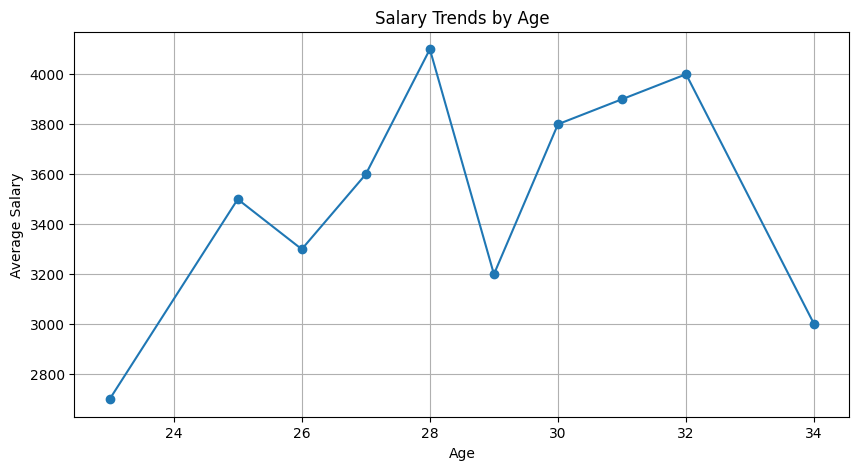

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.


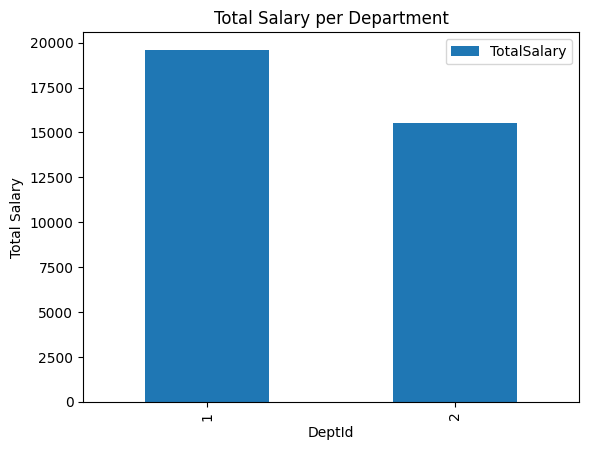

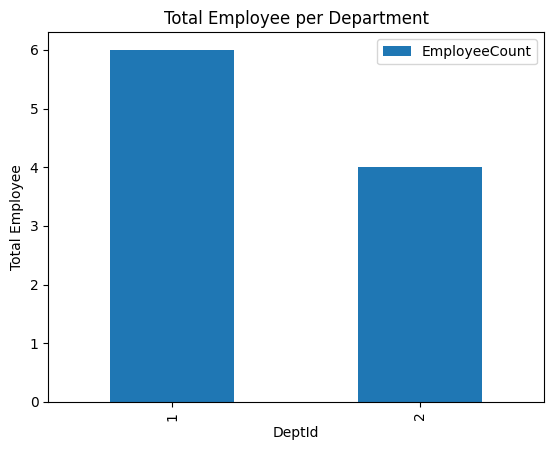

In [ ]:
#1 Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
dept_salary = spark.sql('''
SELECT DeptId, SUM(Salary) as TotalSalary, COUNT(*) as EmployeeCount
FROM employees
GROUP BY DeptId
''').toPandas()

# Visualization of total salary
dept_salary.plot(kind='bar', x='DeptId', y='TotalSalary', legend=True)
plt.title('Total Salary per Department')
plt.ylabel('Total Salary')
plt.show()

# Visualization of total employee
dept_salary.plot(kind='bar', x='DeptId', y='EmployeeCount', legend=True)
plt.title('Total Employee per Department')
plt.ylabel('Total Employee')
plt.show()


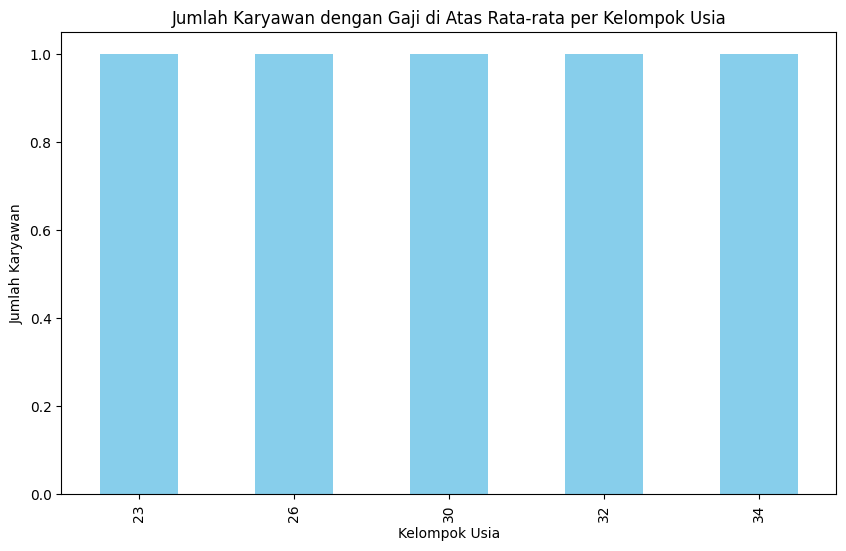

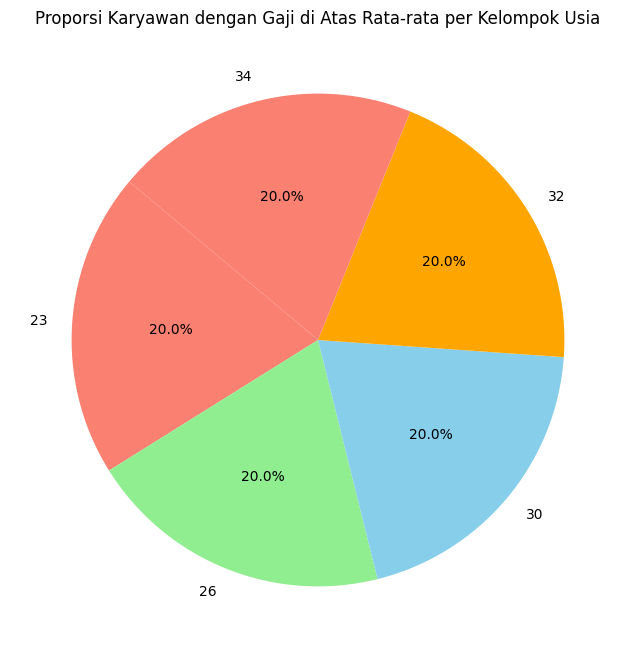

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Query untuk menemukan karyawan dengan gaji di atas rata-rata di setiap kelompok usia
above_avg_salary = spark.sql('''
SELECT Name, Age, Salary
FROM (
    SELECT Name, Age, Salary,
           AVG(Salary) OVER (PARTITION BY Age) AS AvgSalary
    FROM employees
) AS subquery
WHERE Salary > AvgSalary
''').toPandas()

# Step 2: Visualisasi data
# Check if the DataFrame is empty before plotting
if not above_avg_salary.empty:
    # Grafik batang: Jumlah karyawan di atas rata-rata per kelompok usia
    plt.figure(figsize=(10, 6))
    above_avg_salary['Age'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Jumlah Karyawan dengan Gaji di Atas Rata-rata per Kelompok Usia')
    plt.xlabel('Kelompok Usia')
    plt.ylabel('Jumlah Karyawan')
    plt.show()

    # Grafik pie chart: Proporsi karyawan dengan gaji di atas rata-rata per kelompok usia
    plt.figure(figsize=(8, 8))
    above_avg_salary['Age'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['salmon', 'lightgreen', 'skyblue', 'orange'])
    plt.title('Proporsi Karyawan dengan Gaji di Atas Rata-rata per Kelompok Usia')
    plt.ylabel('')
    plt.show()
else:
    print("DataFrame 'above_avg_salary' is empty. No data to plot.")

In [ ]:
#3
import random
from pyspark.sql import Row
import pandas as pd

# Membuat data besar untuk employees
random.seed(42)
names = ["James", "Anna", "Lee", "Kathy", "Tom", "Emily", "Robert", "Linda", "Michael", "Sarah"]
departments = [("HR", 1), ("Marketing", 2), ("IT", 3), ("Finance", 4), ("Sales", 5)]
employees_data = [
    Row(
        Name=random.choice(names),
        Age=random.randint(21, 60),
        Gender=random.choice(["M", "F"]),
        Salary=random.randint(2000, 9000),
        DeptId=random.choice([1, 2, 3, 4, 5])
    ) for _ in range(100)
]
departments_data = [Row(DeptName=dept[0], DeptId=dept[1]) for dept in departments]

# Membuat DataFrame
employees_df = spark.createDataFrame(employees_data)
departments_df = spark.createDataFrame(departments_data)

# Menyimpan ke temporary view untuk SQL query
employees_df.createOrReplaceTempView("employees")
departments_df.createOrReplaceTempView("departments")


In [ ]:
salary_analysis = spark.sql('''
SELECT d.DeptName,
       COUNT(e.Name) AS EmployeeCount,
       AVG(e.Salary) AS AvgSalary,
       SUM(e.Salary) AS TotalSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalSalary DESC
''')
salary_analysis.show()


+---------+-------------+-----------------+-----------+
| DeptName|EmployeeCount|        AvgSalary|TotalSalary|
+---------+-------------+-----------------+-----------+
|Marketing|           25|          5536.44|     138411|
|  Finance|           19|5913.631578947368|     112359|
|    Sales|           21|5028.380952380952|     105596|
|       IT|           19|5420.894736842105|     102997|
|       HR|           16|        5825.8125|      93213|
+---------+-------------+-----------------+-----------+



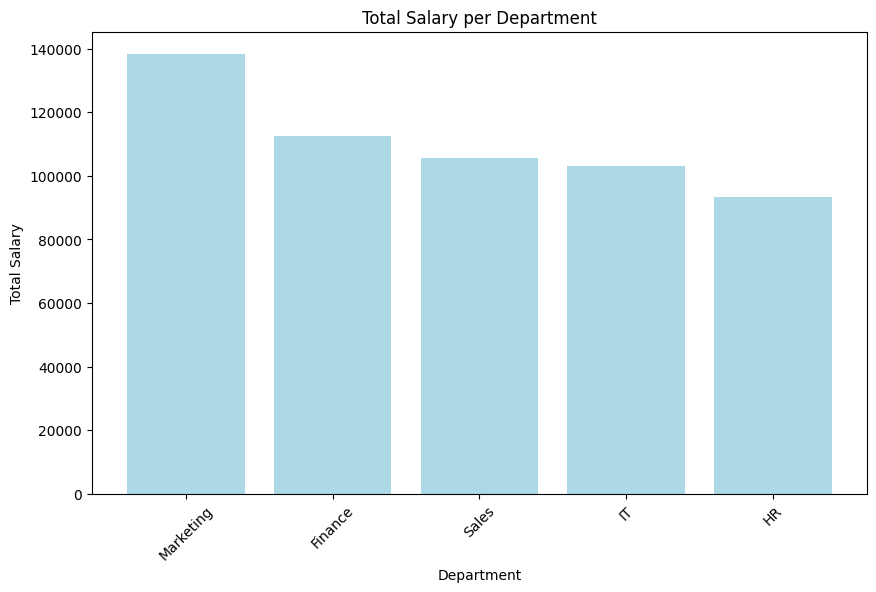

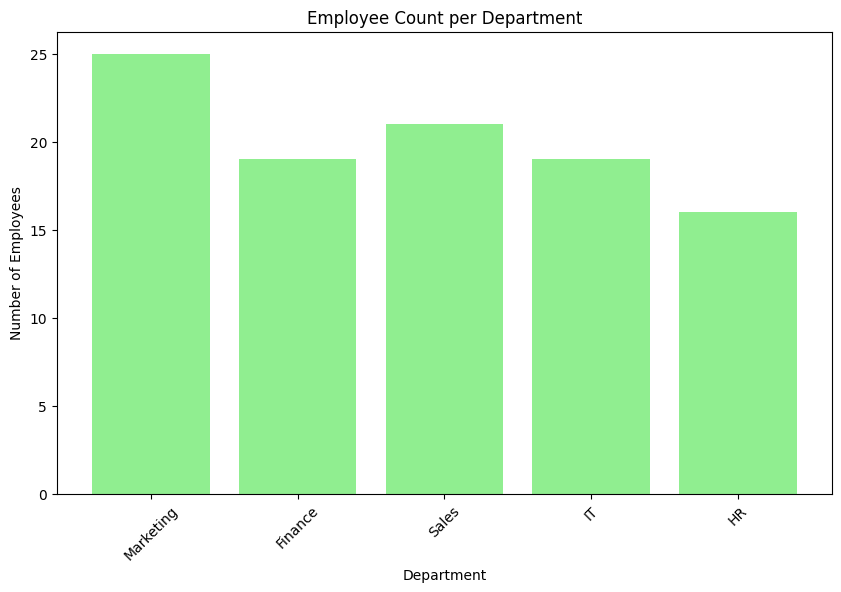

In [ ]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas for plotting
salary_analysis_pdf = salary_analysis.toPandas()

# Visualisasi Total Gaji per Departemen
plt.figure(figsize=(10, 6))
plt.bar(salary_analysis_pdf['DeptName'], salary_analysis_pdf['TotalSalary'], color='lightblue')
plt.title('Total Salary per Department')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.show()

# Visualisasi Jumlah Karyawan per Departemen
plt.figure(figsize=(10, 6))
plt.bar(salary_analysis_pdf['DeptName'], salary_analysis_pdf['EmployeeCount'], color='lightgreen')
plt.title('Employee Count per Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()
